# Exercises



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay
from acquire import get_titanic_data
from prepare import prep_titanic
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:



In [33]:
titanic_df = get_titanic_data()
train,validate,test = prep_titanic(titanic_df)
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,0,0,40.1250,1,0,1,1,0,0
165,165,1,3,0,2,20.5250,0,0,1,0,0,1
50,50,0,3,4,1,39.6875,0,0,1,0,0,1
259,259,1,2,0,1,26.0000,0,1,0,0,0,1
306,306,1,1,0,0,110.8833,1,1,0,1,0,0


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [34]:
#baseline prediction
x = ['embark_town_Cherbourg','embark_town_Queenstown','embark_town_Southampton','alone']
y = 'sex_female' #so chosen because I need to do something different to enjoy this
# Baseline accuracy: accuracy
x_train = train[x]
y_train = train[y]

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



[Text(0.5555555555555556, 0.9, 'alone <= 0.5\ngini = 0.456\nsamples = 498\nvalue = [323, 175]\nclass = male'),
 Text(0.3333333333333333, 0.7, 'embark_town_Queenstown <= 0.5\ngini = 0.498\nsamples = 183\nvalue = [86, 97]\nclass = female'),
 Text(0.2222222222222222, 0.5, 'embark_town_Cherbourg <= 0.5\ngini = 0.497\nsamples = 176\nvalue = [81, 95]\nclass = female'),
 Text(0.1111111111111111, 0.3, 'gini = 0.499\nsamples = 126\nvalue = [61, 65]\nclass = female'),
 Text(0.3333333333333333, 0.3, 'gini = 0.48\nsamples = 50\nvalue = [20, 30]\nclass = female'),
 Text(0.4444444444444444, 0.5, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = male'),
 Text(0.7777777777777778, 0.7, 'embark_town_Queenstown <= 0.5\ngini = 0.373\nsamples = 315\nvalue = [237, 78]\nclass = male'),
 Text(0.6666666666666666, 0.5, 'embark_town_Southampton <= 0.5\ngini = 0.336\nsamples = 281\nvalue = [221, 60]\nclass = male'),
 Text(0.5555555555555556, 0.3, 'embark_town_Cherbourg <= 0.5\ngini = 0.436\nsamples = 53\nvalue 

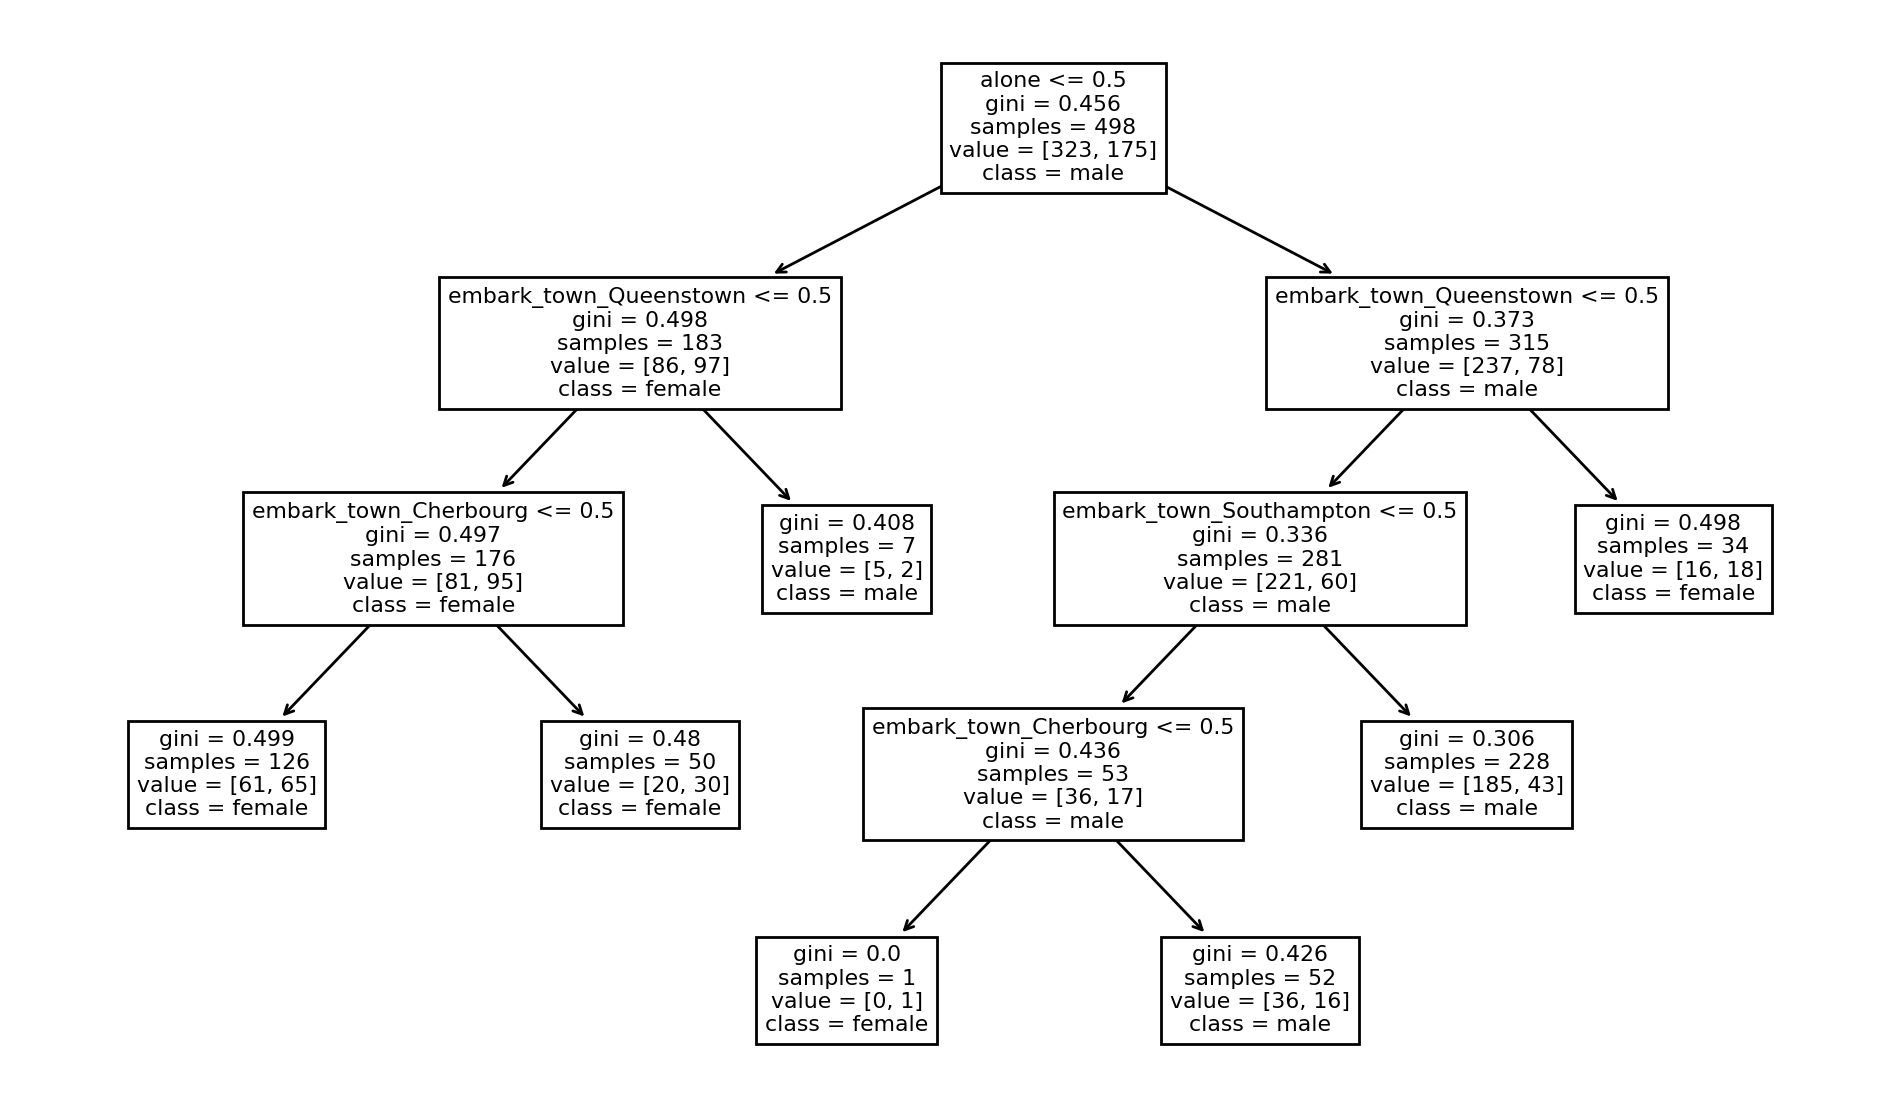

In [35]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(x_train,y_train)
plt.figure(figsize=(12,7))
predicted = tree.predict(train[x])
plot_tree(tree,feature_names=x_train.columns,class_names=['male','female'])

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



array([[226,  97],
       [ 61, 114]])

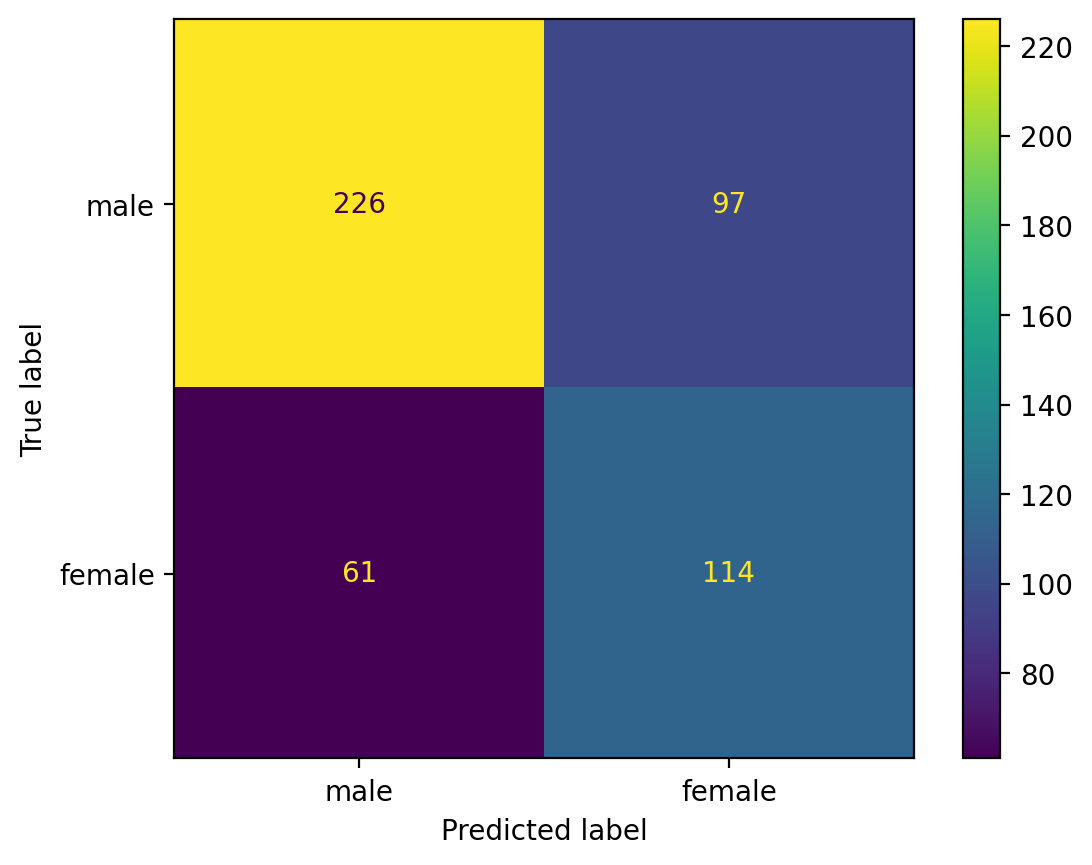

In [47]:

confusion_disp = ConfusionMatrixDisplay.from_predictions(y_train,predicted,display_labels=['male','female'])
confusion = confusion_disp.confusion_matrix
confusion

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [52]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train,predicted)
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       323
           1       0.54      0.65      0.59       175

    accuracy                           0.68       498
   macro avg       0.66      0.68      0.67       498
weighted avg       0.70      0.68      0.69       498



5. Run through steps 2-4 using a different max_depth value.



[Text(0.5555555555555556, 0.9, 'alone <= 0.5\ngini = 0.456\nsamples = 498\nvalue = [323, 175]\nclass = male'),
 Text(0.3333333333333333, 0.7, 'embark_town_Queenstown <= 0.5\ngini = 0.498\nsamples = 183\nvalue = [86, 97]\nclass = female'),
 Text(0.2222222222222222, 0.5, 'embark_town_Southampton <= 0.5\ngini = 0.497\nsamples = 176\nvalue = [81, 95]\nclass = female'),
 Text(0.1111111111111111, 0.3, 'gini = 0.48\nsamples = 50\nvalue = [20, 30]\nclass = female'),
 Text(0.3333333333333333, 0.3, 'gini = 0.499\nsamples = 126\nvalue = [61, 65]\nclass = female'),
 Text(0.4444444444444444, 0.5, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = male'),
 Text(0.7777777777777778, 0.7, 'embark_town_Queenstown <= 0.5\ngini = 0.373\nsamples = 315\nvalue = [237, 78]\nclass = male'),
 Text(0.6666666666666666, 0.5, 'embark_town_Southampton <= 0.5\ngini = 0.336\nsamples = 281\nvalue = [221, 60]\nclass = male'),
 Text(0.5555555555555556, 0.3, 'embark_town_Cherbourg <= 0.5\ngini = 0.436\nsamples = 53\nvalu

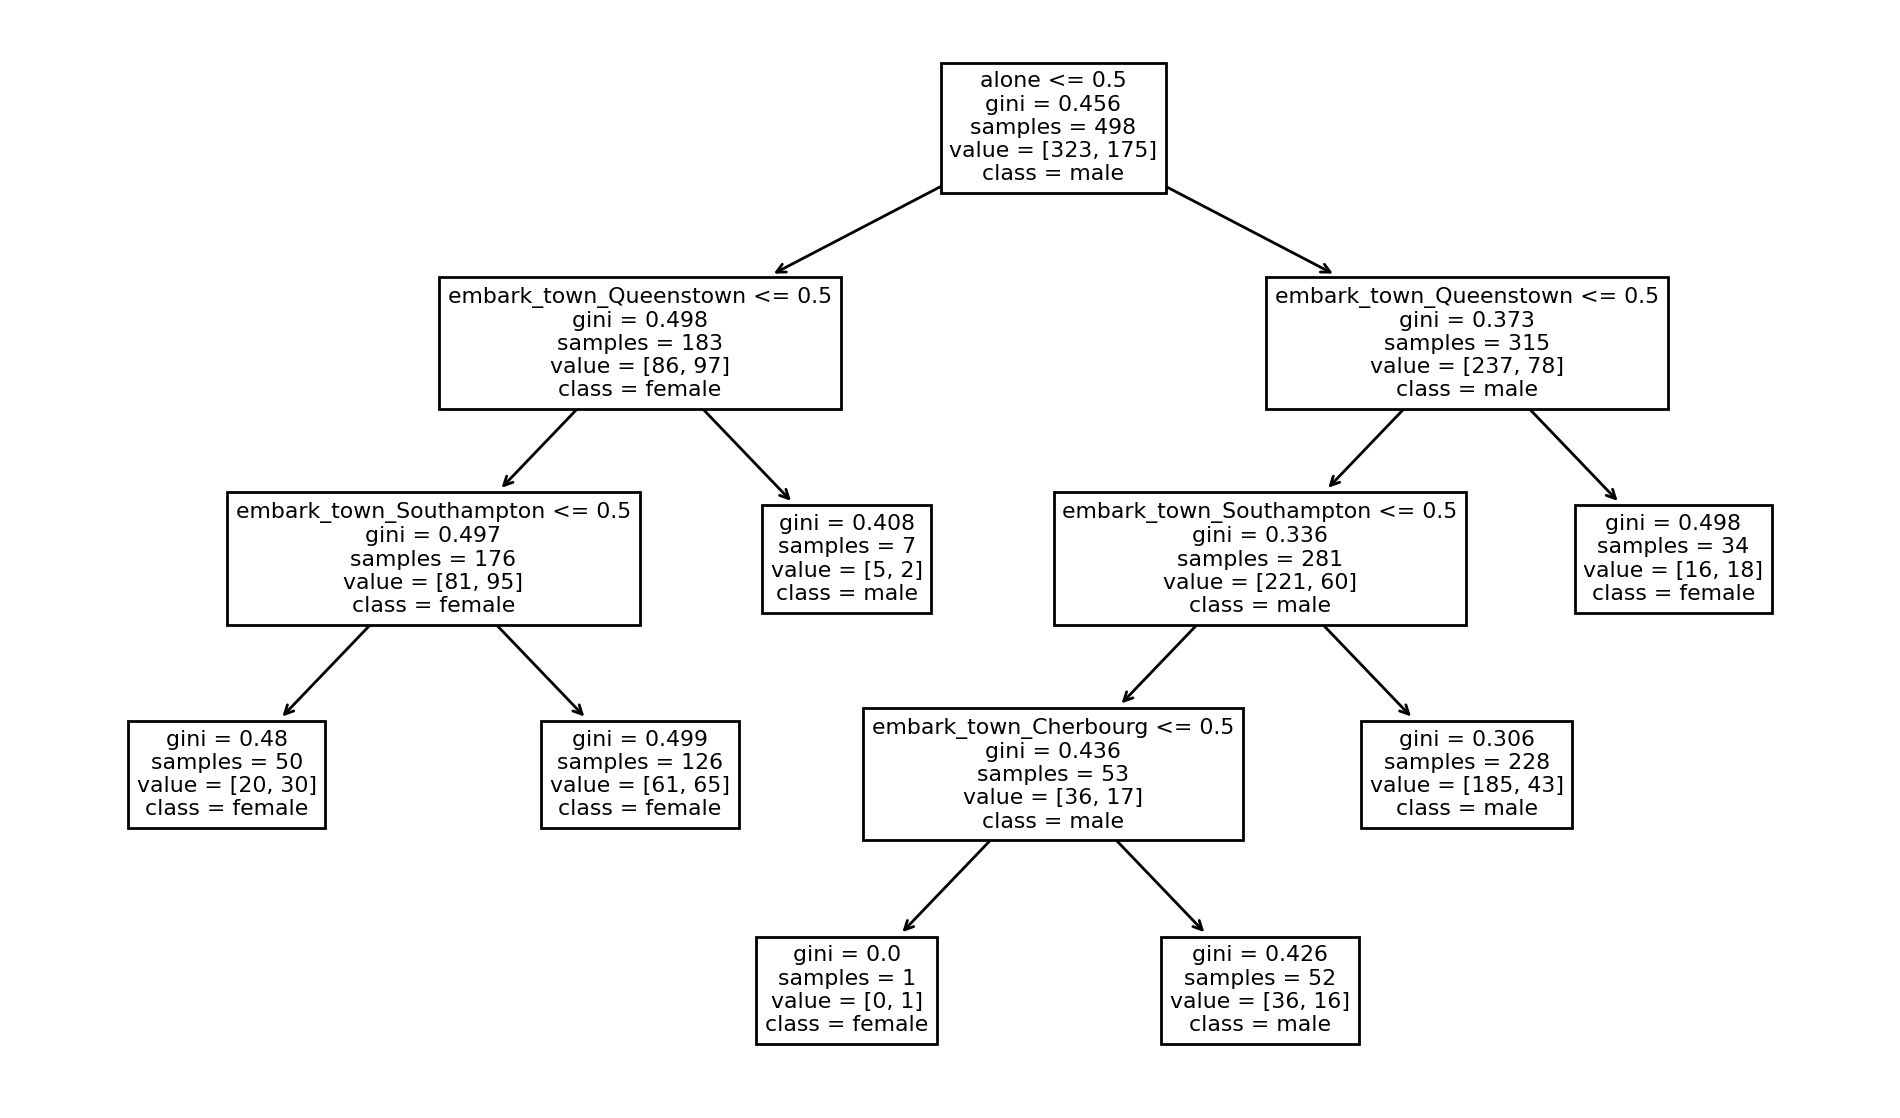

In [55]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(x_train,y_train)
plt.figure(figsize=(12,7))
predicted = tree.predict(train[x])
plot_tree(tree,feature_names=x_train.columns,class_names=['male','female'])

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

8. Work through these same exercises using the Telco dataset.
